In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

In [2]:
pip list | grep fastai

fastai                   2.3.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
import fastai
from fastai.tabular import *
from fastai.tabular.core import *

In [36]:
dataset = pd.read_csv("../Dataset/Final_Dataset.csv", low_memory=False)

In [27]:
dataset.columns

Index(['DATE', 'MORTGAGE15US_Monthly Change', 'MORTGAGE30US_Monthly Change',
       'MORTGAGE5US_Monthly Change', 'Rent Index Mon_Chg', 'NASDAQCOM Mon_Chg',
       'WILL5000 Per_Mon_Chg', 'House Completed', 'House Under Construction',
       '5yr_Maturity Per_Mon_Chg', '10yr_Maturity Per_Mon_Chg',
       '30yr_Maturity Per_Mon_Chg', 'CPI Mon_Chg',
       'House Index Monthly Change', 'Year', 'Month', 'Unemployment Rate',
       'Unemployment Rate - Black or African American',
       'Unemployment Rate - White', 'Insured Unemployment Rate',
       'Number Unemployed for 27 Weeks & Over', 'EMRATIO', 'Personal Income',
       'Real Personal Income', 'Job Openings- Total Nonfarm',
       'AverageHourlySalary-Private', 'Median Sales Price for New Houses Sold',
       'Real Private Residential Fixed Investment',
       'Total Construction Spending- Residential',
       'Monthly Supply of Houses in the United States',
       'Homeownership Rate for the United States'],
      dtype='object')

In [28]:
to_pred = "House Index Monthly Change"

`DATE`: Month and Year of the observation

`MORTGAGE15US_Monthly Change`: 15 Year Constant Interest Rate on Mortgage

`MORTGAGE30US_Monthly Change`: 30 Year Constant Interest Rate on Mortgage

`MORTGAGE5US_Monthly Change`: 5 Year Constant and every next year Increasing Interest Rate on Mortgage (1 yr- Adjustable)

`Rent Index Mon_Chg`: Rent Index Monthly Change

`NASDAQCOM Mon_Chg`: NASDAQ Composite Index Monthly Change

`WILL5000 Per_Mon_Chg`: WILL5000 Index Monthly Percent Change

`House Completed`: New Houses Completed on that Month

`House Under Construction`: New Houses under Construction that Month

`5yr_Maturity Per_Mon_Chg`: Treasury Bond 5 yr Maturity Interest Percent Monthly Change

`10yr_Maturity Per_Mon_Chg`: Treasury Bond 10 yr Maturity Interest Percent Monthly Change

`30yr_Maturity Per_Mon_Chg`: Treasury Bond 30 yr Maturity Interest Percent Monthly Change

`CPI Mon_Chg`: Consumer Price Index Monthly Change

`House Index Monthly Change`: House Price Index Monthly Change

`Year`: Year

`Unemployment Rate`,
       `Unemployment Rate - Black or African American`,
       `Unemployment Rate - White`, `Insured Unemployment Rate`,
       `Number Unemployed for 27 Weeks & Over`, `EMRATIO`, `Personal Income`,
       `Real Personal Income`, `Job Openings- Total Nonfarm`,
       `AverageHourlySalary-Private`, `Median Sales Price for New Houses Sold`,
       `Real Private Residential Fixed Investment`,
       `Total Construction Spending- Residential`,
       `Monthly Supply of Houses in the United States`,
       `Homeownership Rate for the United States`, `DATEYear`, `DATEMonth`,
       `DATEWeek`, `DATEDay`, `DATEDayofweek`, `DATEDayofyear`,
       `DATEIs_month_end`, `DATEIs_month_start`, `DATEIs_quarter_end`,
       `DATEIs_quarter_start`, `DATEIs_year_end`, `DATEIs_year_start`,
       `DATEElapsed`


Fastai is a deep learning library based on Pytorch. It's fastai.tabular has several preprocessing functions which I am going to use.

In [29]:
dataset = dataset.drop(columns=["Year", "Month"]).columns

In [41]:
df = add_datepart(df=dataset, field_name='DATE')

In [42]:
df.columns

Index(['MORTGAGE15US_Monthly Change', 'MORTGAGE30US_Monthly Change',
       'MORTGAGE5US_Monthly Change', 'Rent Index Mon_Chg', 'NASDAQCOM Mon_Chg',
       'WILL5000 Per_Mon_Chg', 'House Completed', 'House Under Construction',
       '5yr_Maturity Per_Mon_Chg', '10yr_Maturity Per_Mon_Chg',
       '30yr_Maturity Per_Mon_Chg', 'CPI Mon_Chg',
       'House Index Monthly Change', 'Year', 'Month', 'Unemployment Rate',
       'Unemployment Rate - Black or African American',
       'Unemployment Rate - White', 'Insured Unemployment Rate',
       'Number Unemployed for 27 Weeks & Over', 'EMRATIO', 'Personal Income',
       'Real Personal Income', 'Job Openings- Total Nonfarm',
       'AverageHourlySalary-Private', 'Median Sales Price for New Houses Sold',
       'Real Private Residential Fixed Investment',
       'Total Construction Spending- Residential',
       'Monthly Supply of Houses in the United States',
       'Homeownership Rate for the United States', 'DATEYear', 'DATEMonth',
       

New columns added due to `add_datepart()` fn.

In [43]:
' '.join(o for o in df.columns if o.startswith('DATE'))

'DATEYear DATEMonth DATEWeek DATEDay DATEDayofweek DATEDayofyear DATEIs_month_end DATEIs_month_start DATEIs_quarter_end DATEIs_quarter_start DATEIs_year_end DATEIs_year_start DATEElapsed'

We can drop `DATEDay`, `DATEIs_month_start`, `DATEIs_month_end` as they will have same values for all the rows.

In [51]:
df['DATEDay'].unique(), df['DATEIs_month_end'].unique(), df['DATEIs_month_start'].unique()

(array([1]), array([False]), array([ True]))

In [52]:
df= df.drop(columns=['DATEDay', 'DATEIs_month_end', 'DATEIs_month_start'])

In [62]:
df.isna().sum()/df.shape[0]*100

MORTGAGE15US_Monthly Change                       0.000000
MORTGAGE30US_Monthly Change                       0.000000
MORTGAGE5US_Monthly Change                       23.809524
Rent Index Mon_Chg                                0.000000
NASDAQCOM Mon_Chg                                 0.000000
WILL5000 Per_Mon_Chg                              0.000000
House Completed                                   0.000000
House Under Construction                          0.000000
5yr_Maturity Per_Mon_Chg                          0.000000
10yr_Maturity Per_Mon_Chg                         0.000000
30yr_Maturity Per_Mon_Chg                         0.000000
CPI Mon_Chg                                       0.000000
House Index Monthly Change                        0.000000
Year                                              0.000000
Month                                             0.000000
Unemployment Rate                                 0.000000
Unemployment Rate - Black or African American     0.0000

`Real Private Residential Fixed Investment        69.841270`

`Homeownership Rate for the United States         66.666667`

`AverageHourlySalary-Private                      29.365079`

`MORTGAGE5US_Monthly Change                       23.809524`

`Total Construction Spending- Residential          9.523810`

`Job Openings- Total Nonfarm                       4.365079`

There are lot of missing data in some columns but for now I am going with standard preprocessing and imputing. Later on seeing the feature importance and analysis will take on decision to drop the columns.

Giving the numerical description of dataset. 

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MORTGAGE15US_Monthly Change,252.0,-2.216071e-02,1.598972e-01,-7.520000e-01,-1.088750e-01,-3.550000e-02,4.312500e-02,6.205000e-01
MORTGAGE30US_Monthly Change,252.0,-2.192857e-02,1.675408e-01,-8.015000e-01,-1.226250e-01,-3.850000e-02,5.625000e-02,6.315000e-01
MORTGAGE5US_Monthly Change,192.0,-1.171615e-02,1.142129e-01,-4.080000e-01,-7.362500e-02,-1.800000e-02,4.350000e-02,3.270000e-01
Rent Index Mon_Chg,252.0,3.581454e-01,1.535646e-01,-1.669500e-01,2.763900e-01,3.604200e-01,4.635150e-01,7.307900e-01
NASDAQCOM Mon_Chg,252.0,9.011296e-01,6.738026e+00,-2.200995e+01,-1.963723e+00,1.058660e+00,3.531090e+00,3.266588e+01
WILL5000 Per_Mon_Chg,252.0,5.329494e-01,4.495364e+00,-1.770616e+01,-1.917886e+00,1.067772e+00,3.411108e+00,1.313235e+01
House Completed,252.0,9.545357e+00,3.955034e+00,3.680000e+00,6.040000e+00,8.550000e+00,1.308250e+01,1.911000e+01
House Under Construction,252.0,5.393968e+00,2.126262e+00,2.350000e+00,3.440000e+00,5.200000e+00,6.890000e+00,9.900000e+00
5yr_Maturity Per_Mon_Chg,252.0,-4.887928e-01,1.090889e+01,-5.530303e+01,-5.634848e+00,-1.040584e+00,4.487241e+00,4.296296e+01
10yr_Maturity Per_Mon_Chg,252.0,-3.342945e-01,9.348693e+00,-3.805310e+01,-5.028490e+00,-2.337241e-01,4.247392e+00,3.090909e+01


Lets round of all the values to 3 decimal points. 

In [66]:
df = df.round(3)

Dividing the columns in categorical or continous. The division strategy is to put the coulumns with cardinality 10 or less into categorical.

In [71]:
cont,cat = cont_cat_split(df, 10, dep_var=to_pred)

In [74]:
procs = [Categorify, FillMissing]

In [81]:
cond = df.DATEYear < 2018
train_idx = np.where(cond)[0]
val_idx = np.where(~cond)[0]

In [82]:
splits = (list(train_idx), list(val_idx))

In [83]:
to = TabularPandas(df, procs, cat, cont, y_names=to_pred, splits=splits)

In [84]:
len(to.train), len(to.valid)

(216, 36)

In [96]:
to.items.isna().sum()

MORTGAGE15US_Monthly Change                      0
MORTGAGE30US_Monthly Change                      0
MORTGAGE5US_Monthly Change                       0
Rent Index Mon_Chg                               0
NASDAQCOM Mon_Chg                                0
WILL5000 Per_Mon_Chg                             0
House Completed                                  0
House Under Construction                         0
5yr_Maturity Per_Mon_Chg                         0
10yr_Maturity Per_Mon_Chg                        0
30yr_Maturity Per_Mon_Chg                        0
CPI Mon_Chg                                      0
House Index Monthly Change                       0
Year                                             0
Month                                            0
Unemployment Rate                                0
Unemployment Rate - Black or African American    0
Unemployment Rate - White                        0
Insured Unemployment Rate                        0
Number Unemployed for 27 Weeks 

In [97]:
to.show(5)

,DATEDayofweek,DATEIs_quarter_end,DATEIs_quarter_start,DATEIs_year_end,DATEIs_year_start,MORTGAGE5US_Monthly Change_na,Job Openings- Total Nonfarm_na,AverageHourlySalary-Private_na,Real Private Residential Fixed Investment_na,Total Construction Spending- Residential_na,Homeownership Rate for the United States_na,MORTGAGE15US_Monthly Change,MORTGAGE30US_Monthly Change,MORTGAGE5US_Monthly Change,Rent Index Mon_Chg,NASDAQCOM Mon_Chg,WILL5000 Per_Mon_Chg,House Completed,House Under Construction,5yr_Maturity Per_Mon_Chg,10yr_Maturity Per_Mon_Chg,30yr_Maturity Per_Mon_Chg,CPI Mon_Chg,Year,Month,Unemployment Rate,Unemployment Rate - Black or African American,Unemployment Rate - White,Insured Unemployment Rate,Number Unemployed for 27 Weeks & Over,EMRATIO,Personal Income,Real Personal Income,Job Openings- Total Nonfarm,AverageHourlySalary-Private,Median Sales Price for New Houses Sold,Real Private Residential Fixed Investment,Total Construction Spending- Residential,Monthly Supply of Houses in the United States,Homeownership Rate for the United States,DATEYear,DATEMonth,DATEWeek,DATEDayofyear,DATEElapsed,House Index Monthly Change
0,5,False,True,False,True,False,True,True,True,True,False,0.000,0.000,0.000,0.000,0.000000,0.000,12.62,6.79,0.000,0.000,0.000,0.000,2000,1,4.0,8.2,3.4,2.160,721,64.599998,8396.799805,10855.813477,4044.0,23.255001,163500.0,580.498535,414805.0,4.3,67.099998,2000,1,52,1,946684800.0,0.000
1,1,False,False,False,False,True,True,True,True,True,True,0.130,0.115,-0.018,0.221,19.195000,2.119,13.26,6.78,1.520,-3.892,-6.033,0.413,2000,2,4.1,8.1,3.6,2.075,629,64.599998,8458.000000,10899.897461,4044.0,23.255001,162400.0,580.498535,414805.0,4.3,67.400002,2000,2,5,32,949363200.0,0.787
2,2,False,False,False,False,True,True,True,True,True,True,-0.101,-0.085,-0.018,0.332,-3.143000,5.811,13.12,6.75,-2.695,-6.075,-2.889,0.591,2000,3,4.0,7.4,3.5,1.950,646,64.599998,8516.900391,10929.236328,4044.0,23.255001,165100.0,580.498535,414805.0,4.3,67.400002,2000,3,9,61,951868800.0,0.788
3,5,False,True,False,False,True,True,True,True,True,False,-0.032,-0.088,-0.018,0.221,-18.073999,-5.277,13.07,6.72,-3.692,3.317,-3.306,-0.059,2000,4,3.8,7.0,3.4,1.640,599,64.699997,8551.400391,10984.370117,4044.0,23.255001,162600.0,580.498535,414805.0,4.4,67.300003,2000,4,13,92,954547200.0,0.795
4,0,False,False,False,False,True,True,True,True,True,True,0.382,0.363,-0.018,0.276,-11.668000,-3.609,13.34,6.66,6.869,0.963,5.128,0.177,2000,5,4.0,7.7,3.5,1.450,643,64.400002,8586.799805,11021.996094,4044.0,23.255001,164700.0,580.498535,414805.0,4.4,67.400002,2000,5,18,122,957139200.0,0.755


All the missing values had been filled with Median.
We are still seeing the Categorical Values but underline they are transformed into numeric.

In [93]:
to.items.head(5)

,MORTGAGE15US_Monthly Change,MORTGAGE30US_Monthly Change,MORTGAGE5US_Monthly Change,Rent Index Mon_Chg,NASDAQCOM Mon_Chg,WILL5000 Per_Mon_Chg,House Completed,House Under Construction,5yr_Maturity Per_Mon_Chg,10yr_Maturity Per_Mon_Chg,...,DATEIs_quarter_start,DATEIs_year_end,DATEIs_year_start,DATEElapsed,MORTGAGE5US_Monthly Change_na,Job Openings- Total Nonfarm_na,AverageHourlySalary-Private_na,Real Private Residential Fixed Investment_na,Total Construction Spending- Residential_na,Homeownership Rate for the United States_na
0,0.000,0.000,0.000,0.000,0.000000,0.000,12.62,6.79,0.000,0.000,...,2,1,2,946684800.0,1,2,2,2,2,1
1,0.130,0.115,-0.018,0.221,19.195000,2.119,13.26,6.78,1.520,-3.892,...,1,1,1,949363200.0,2,2,2,2,2,2
2,-0.101,-0.085,-0.018,0.332,-3.143000,5.811,13.12,6.75,-2.695,-6.075,...,1,1,1,951868800.0,2,2,2,2,2,2
3,-0.032,-0.088,-0.018,0.221,-18.073999,-5.277,13.07,6.72,-3.692,3.317,...,2,1,1,954547200.0,2,2,2,2,2,1
4,0.382,0.363,-0.018,0.276,-11.668000,-3.609,13.34,6.66,6.869,0.963,...,1,1,1,957139200.0,2,2,2,2,2,2


In [103]:
xs, y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [336]:
to.items.to_pickle("finalDataset.pkl")

## Decision Tree with default values

In [104]:
m = DecisionTreeRegressor()

In [105]:
m.fit(xs, y)

DecisionTreeRegressor()

In [106]:
def r_mse(pred, y):
    return round(np.sqrt(((pred-y)**2).mean()), 6)

In [107]:
def m_rmse(m, xs, y):
    return r_mse(m.predict(xs), y)

In [108]:
m_rmse(m, xs, y)

0.0

In [109]:
m_rmse(m, valid_xs, valid_y)

1.013711

In [111]:
m.get_n_leaves(), len(xs)

(215, 216)

We have nearly as many leaf nodes as data points!
We can see that when we were going with default values and we are not passing in any stopping criteria such as max_leaf_nodes. Its overfitting badly.

In [222]:
m2 = DecisionTreeRegressor(min_samples_leaf=1, random_state=42)

In [223]:
m2.fit(xs, y)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=68, random_state=42)

In [224]:
m_rmse(m2, xs, y)

0.540952

In [225]:
m_rmse(m2, valid_xs, valid_y)

0.803491

In [327]:
model = DecisionTreeRegressor(max_leaf_nodes=10, min_samples_leaf=70, max_depth=2, random_state=42)
model.fit(xs, y)
print(m_rmse(model, valid_xs, valid_y))

0.803491


<table>
  <tr>
    <th>max_depth</th>
    <th>min_samples_leaf</th>
    <th>max_leaf_nodes</th>
    <th>Validation_Error</th>
  </tr>
  <tr>
      <td>None</td>
      <td>None</td>
      <td>15</td>
      <td>1.003</td>
    </tr>
    <tr>
        <td>None</td> 
        <td>None</td>
        <td>10</td> 
        <td>0.948016</td>
    </tr>
    <tr>
        <td>None</td> 
        <td>None</td>
        <td>2</td>
        <td>0.902582</td>
    </tr>
    <tr>
        <td>None</td> 
        <td>10</td>
        <td>2</td>
        <td>0.902582</td>
    </tr>
    <tr>
        <td>None</td> 
        <td>70</td>
        <td>2</td>
        <td>0.902582</td>
    </tr>
    <tr>
        <td>2</td> 
        <td>70</td>
        <td>10</td>
        <td>0.803491</td>
    </tr>
    <tr>
        <td>2</td> 
        <td>80</td>
        <td>10</td>
        <td>1.220358</td>
    </tr>
    <tr>
        <td>2</td> 
        <td>72</td>
        <td>10</td>
        <td>1.171419</td>
    </tr>
    <tr>
        <td>2</td> 
        <td>65</td>
        <td>10</td>
        <td>0.811826</td>
    </tr>
    <tr>
        <td>2</td> 
        <td>30</td>
        <td>10</td>
        <td>0.8772</td>
    </tr>
    <tr>
        <td>2</td> 
        <td>32</td>
        <td>10</td>
        <td>0.95993</td>
    </tr>

### Best model is Decision Tree with above mentioned parameters.

I tried more set of `parameters` but was not able to get better accuracy.

In [329]:
from sklearn import tree

[Text(372.0, 755.0, 'AverageHourlySalary-Private <= 23.248\nmse = 0.917\nsamples = 216\nvalue = 0.447'),
 Text(186.0, 453.0, 'mse = 0.582\nsamples = 71\nvalue = -0.657'),
 Text(558.0, 453.0, 'Rent Index Mon_Chg <= 0.34\nmse = 0.19\nsamples = 145\nvalue = 0.988'),
 Text(372.0, 151.0, 'mse = 0.213\nsamples = 71\nvalue = 1.191'),
 Text(744.0, 151.0, 'mse = 0.091\nsamples = 74\nvalue = 0.793')]

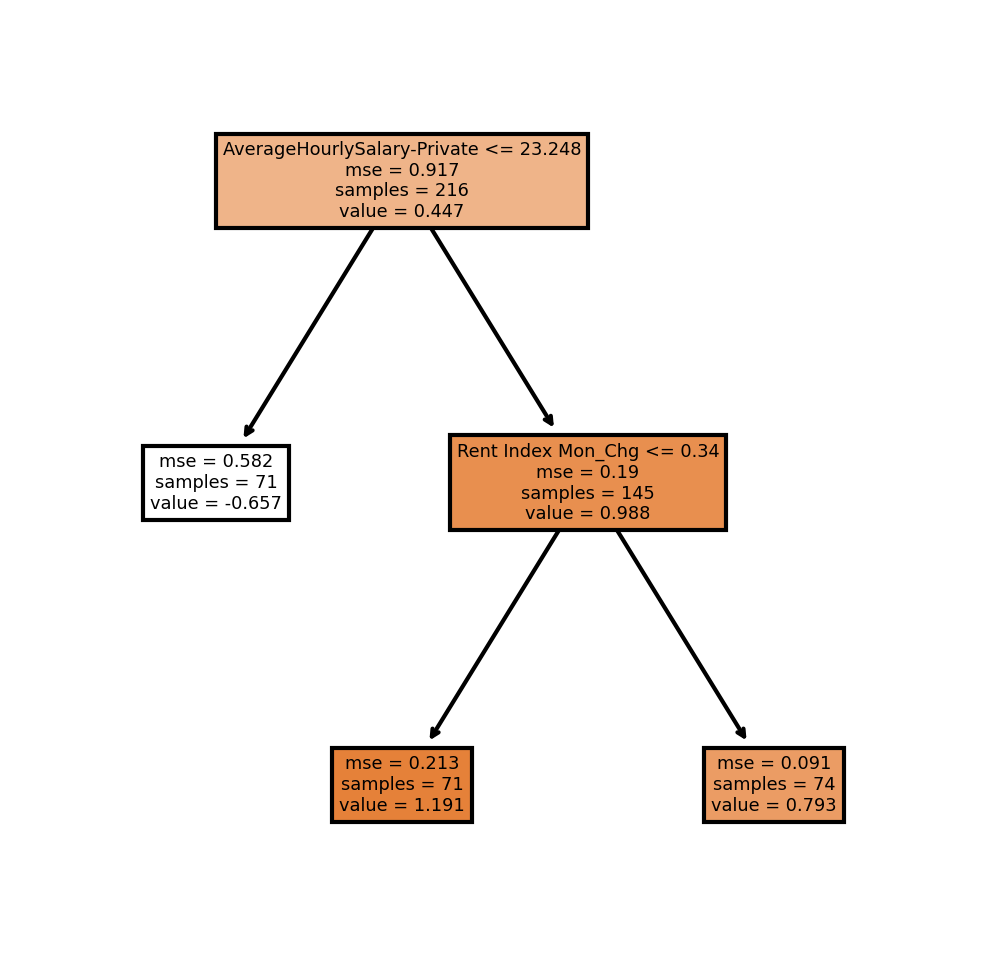

In [332]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model, feature_names=xs.columns, filled=True)

### Random Forest Regressor (bagging)

In [341]:
def rf(xs, y, n_estimators=100, max_samples=len(xs),max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,max_samples=max_samples, max_features=max_features, min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [343]:
rm = rf(xs, y, min_samples_leaf=10)

In [344]:
m_rmse(rm, xs, y)

0.31314

In [345]:
m_rmse(rm, valid_xs, valid_y)

0.887424

### random go-through on different parameters 

In [349]:
estimators = [20, 50,  70, 100]
ftr= [0.4, 0.5, 0.8, "sqrt", "log2"]
sample = [2,  11, 20,  32, 43,  50]

In [350]:
for e in estimators:
    for f in ftr:
        for s in sample:
            rm = rf(xs, y, n_estimators=e, max_features=f, min_samples_leaf=s)
#             print("Train error: ",m_rmse(rm, xs, y))
            print(e, f, s)
            print("Valid error: ",m_rmse(rm, valid_xs, valid_y))

20 0.4 2
Valid error:  0.898383
20 0.4 11
Valid error:  0.890923
20 0.4 20
Valid error:  0.918909
20 0.4 32
Valid error:  0.918174
20 0.4 43
Valid error:  0.941085
20 0.4 50
Valid error:  1.152144
20 0.5 2
Valid error:  0.868119
20 0.5 11
Valid error:  0.870974
20 0.5 20
Valid error:  0.917413
20 0.5 32
Valid error:  0.901868
20 0.5 43
Valid error:  0.948783
20 0.5 50
Valid error:  1.103083
20 0.8 2
Valid error:  0.845919
20 0.8 11
Valid error:  0.900593
20 0.8 20
Valid error:  0.901607
20 0.8 32
Valid error:  0.871621
20 0.8 43
Valid error:  0.875959
20 0.8 50
Valid error:  1.076983
20 sqrt 2
Valid error:  0.908249
20 sqrt 11
Valid error:  0.982219
20 sqrt 20
Valid error:  1.01986
20 sqrt 32
Valid error:  0.981255
20 sqrt 43
Valid error:  1.141193
20 sqrt 50
Valid error:  1.162863


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


20 log2 2
Valid error:  0.979442
20 log2 11
Valid error:  1.022773
20 log2 20
Valid error:  0.96037
20 log2 32
Valid error:  0.987509
20 log2 43
Valid error:  1.00957
20 log2 50
Valid error:  1.10052
50 0.4 2
Valid error:  0.859902
50 0.4 11
Valid error:  0.90661
50 0.4 20
Valid error:  0.921354
50 0.4 32
Valid error:  0.902926
50 0.4 43
Valid error:  0.913848
50 0.4 50
Valid error:  1.158552
50 0.5 2
Valid error:  0.876292
50 0.5 11
Valid error:  0.894699
50 0.5 20
Valid error:  0.906799
50 0.5 32
Valid error:  0.903566
50 0.5 43
Valid error:  0.879746
50 0.5 50
Valid error:  1.126921
50 0.8 2
Valid error:  0.868554
50 0.8 11
Valid error:  0.87766
50 0.8 20
Valid error:  0.91553
50 0.8 32
Valid error:  0.857997
50 0.8 43
Valid error:  0.863062
50 0.8 50
Valid error:  1.098596
50 sqrt 2
Valid error:  0.937716
50 sqrt 11
Valid error:  0.969424
50 sqrt 20
Valid error:  1.011409
50 sqrt 32
Valid error:  1.015395
50 sqrt 43
Valid error:  1.062699
50 sqrt 50
Valid error:  1.229241
50 log2 2

## Feature Importance using Random Forest

In [353]:
def rf_feat_importance(model, df):
    return pd.DataFrame({'cols': df.columns, 'imp': model.feature_importances_}).sort_values('imp', ascending=False)

### Feature Importance Dataframe

In [356]:
fi = rf_feat_importance(rm, xs)
fi

,cols,imp
32,Real Personal Income,0.11
38,Monthly Supply of Houses in the United States,0.11
40,DATEYear,0.08
44,DATEElapsed,0.07
18,House Under Construction,0.06
23,Year,0.06
31,Personal Income,0.05
27,Unemployment Rate - White,0.05
17,House Completed,0.05
28,Insured Unemployment Rate,0.04


Among all the columns which we imputed (median) only `Job Openings- Total Nonfarm` is found to have some importance in model learning.

### Most importance features are:

`Real Personal Income	0.11`

`Monthly Supply of Houses in the United States	0.11`

These two are the most important feature as perceived by our RandomForest

### Other features which has greater say in model training are:

DATEYear	0.08,
DATEElapsed	0.07,
House Under Construction	0.06,
Year	0.06,
Personal Income	0.05,
Unemployment Rate - White	0.05,
House Completed	0.05,

### Plotting 20 best columns with their relative importance

In [374]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

<AxesSubplot:ylabel='cols'>

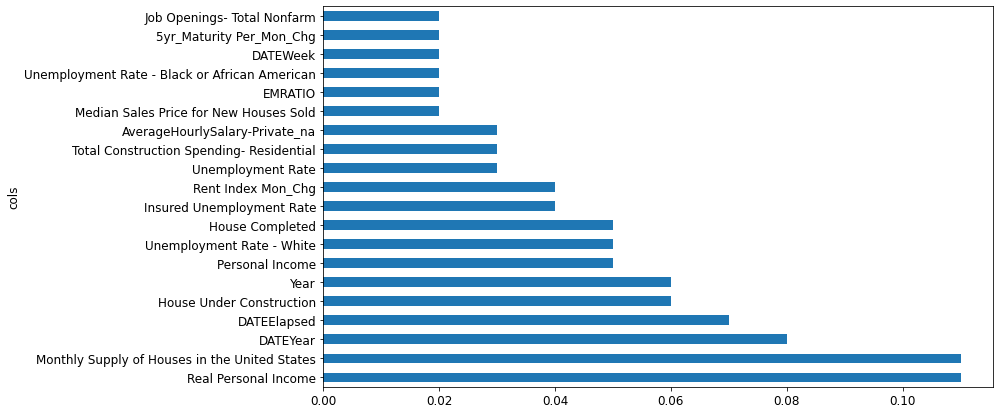

In [396]:
plot_fi(fi[:20])

We can see that several of our features are redundant and not contributing much to model learning. Therefore, I am planning to keep features which has atleast `0.02` importance. 

In [398]:
to_keep = fi[fi.imp>=0.02].cols
len(to_keep)

20

Selecting only the important columns.

In [399]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs_imp[to_keep]

### Clustering common types of features in the dataframe

Based on Rank-Correlation the nearer the columns are merged more related they are.

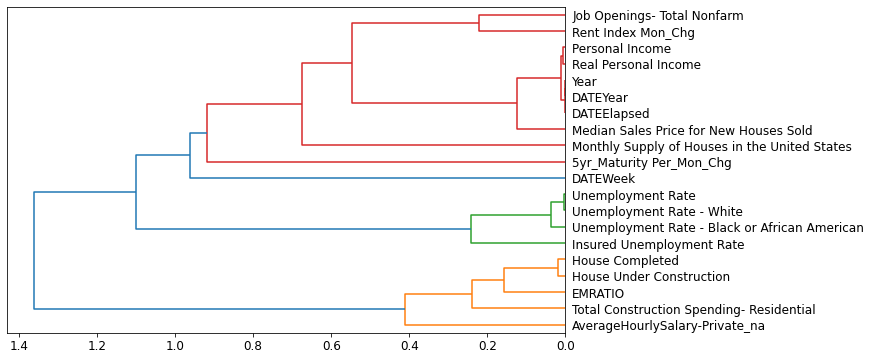

In [400]:
cluster_columns(xs_imp)

`cluster_column()` fn is doing its work almost as expected. Just `Job Openings- Total Nonfarm` and `Rent Index Mon_Chg` are just not feel very connected intutively other that that all Date columns are clustered in a group and same for Unemployment realted columns as well as for Income and House related columns 

`cluster_column()` also shows that I have two year columns in my dataset i.e. `Year` & `DateYear`.

A simple function just for fast reviewing the changes in model.

In [429]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15, max_samples=216, max_features="sqrt", n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [430]:
get_oob(xs_imp)

0.8038223544434872

In [431]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in ['DATEYear', 'Personal Income', 'Unemployment Rate', 'Unemployment Rate - Black or African American', 'Job Openings- Total Nonfarm']}

{'DATEYear': 0.8222812610058915,
 'Personal Income': 0.7783281410227052,
 'Unemployment Rate': 0.7905061412353698,
 'Unemployment Rate - Black or African American': 0.7883028146551521,
 'Job Openings- Total Nonfarm': 0.7970555041527911}

Here we can see that dropping some of these features is affecting very less to the error of the oobs_error, which implies that these are not very necessary.

Lets drop multiple columns and see the oobs_error.

In [432]:
to_drop = ['DATEYear', 'Personal Income', 'Unemployment Rate - Black or African American', 'Job Openings- Total Nonfarm']

In [433]:
get_oob(xs_imp.drop(to_drop, axis=1))

0.8095832801271493

Again the observation in oobs_error is dwindling around 0.80s, no changing much even we are dropping these columns.

Using model for data cleaning and feature selection provide better insights and even non-domain expert of the field can work.

In [441]:
# xs_imp = xs_imp.drop(to_drop, axis=1)
# valid_xs_imp = valid_xs_imp.drop(to_drop, axis =1)

Saving a final set data after feature selection.

In [464]:
xs_imp.to_pickle("./Data/xs_imp.pkl")
valid_xs_imp.to_pickle("./Data/valid_xs_imp.pkl")
y.to_pickle("./Data/y.pkl")
valid_y.to_pickle("./Data/valid_y.pkl")

## GridSearchCV() for hyperparameter tuning

In [468]:
n_estimators = [int(x) for x in np.linspace(start=30, stop=80, num=10)]
max_features= ["sqrt", "auto"]
max_depth = [2, 4, 5]
min_samples_leaf = [1, 3, 5]
bootstrap = [True, False]

In [469]:
param_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features,
    'bootstrap' : bootstrap
}
print(param_grid)

{'n_estimators': [30, 35, 41, 46, 52, 57, 63, 68, 74, 80], 'max_depth': [2, 4, 5], 'min_samples_leaf': [1, 3, 5], 'max_features': ['sqrt', 'auto'], 'bootstrap': [True, False]}


In [470]:
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

In [472]:
grid_search = GridSearchCV(estimator= rf_model, cv=3, param_grid=param_grid, verbose=1, n_jobs=4)

In [473]:
grid_search.fit(xs_imp, y)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 5],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [30, 35, 41, 46, 52, 57, 63, 68, 74,
                                          80]},
             verbose=1)

In [474]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 41}

In [475]:
grid_search.score(valid_xs_imp, valid_y)

-0.3013246218576413

In [476]:
final_model = RandomForestRegressor(n_estimators=41, max_depth=2, max_features="auto", bootstrap=True, random_state=10)

In [477]:
final_model.fit(xs_imp, y)

RandomForestRegressor(max_depth=2, n_estimators=41, random_state=10)

In [478]:
m_rmse(final_model, xs_imp, y)

0.396753

In [479]:
m_rmse(final_model, valid_xs_imp, valid_y)

1.037774

Getting a high error rate. 

### Decision Tree trained earlier was doing better.